# Predict Home Price Feature Prep

This example uses data from https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [1]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt

real_estate_data = pd.read_csv("train.csv")
real_estate_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


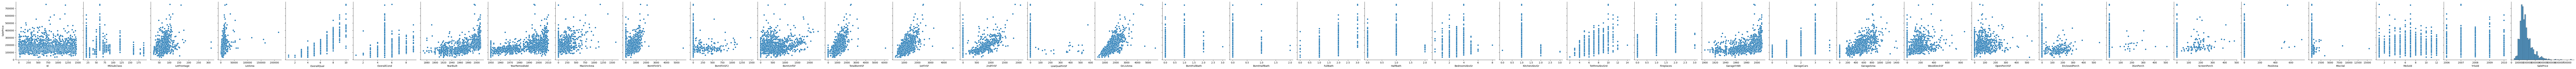

In [10]:
import seaborn
import matplotlib.pyplot as plt

seaborn.pairplot(real_estate_data, y_vars=['SalePrice'], height=4.0)
plt.savefig("real-estate-analysis.png")

Let's reduce the problem space by eliminating variables that don't have a high correlation with the price

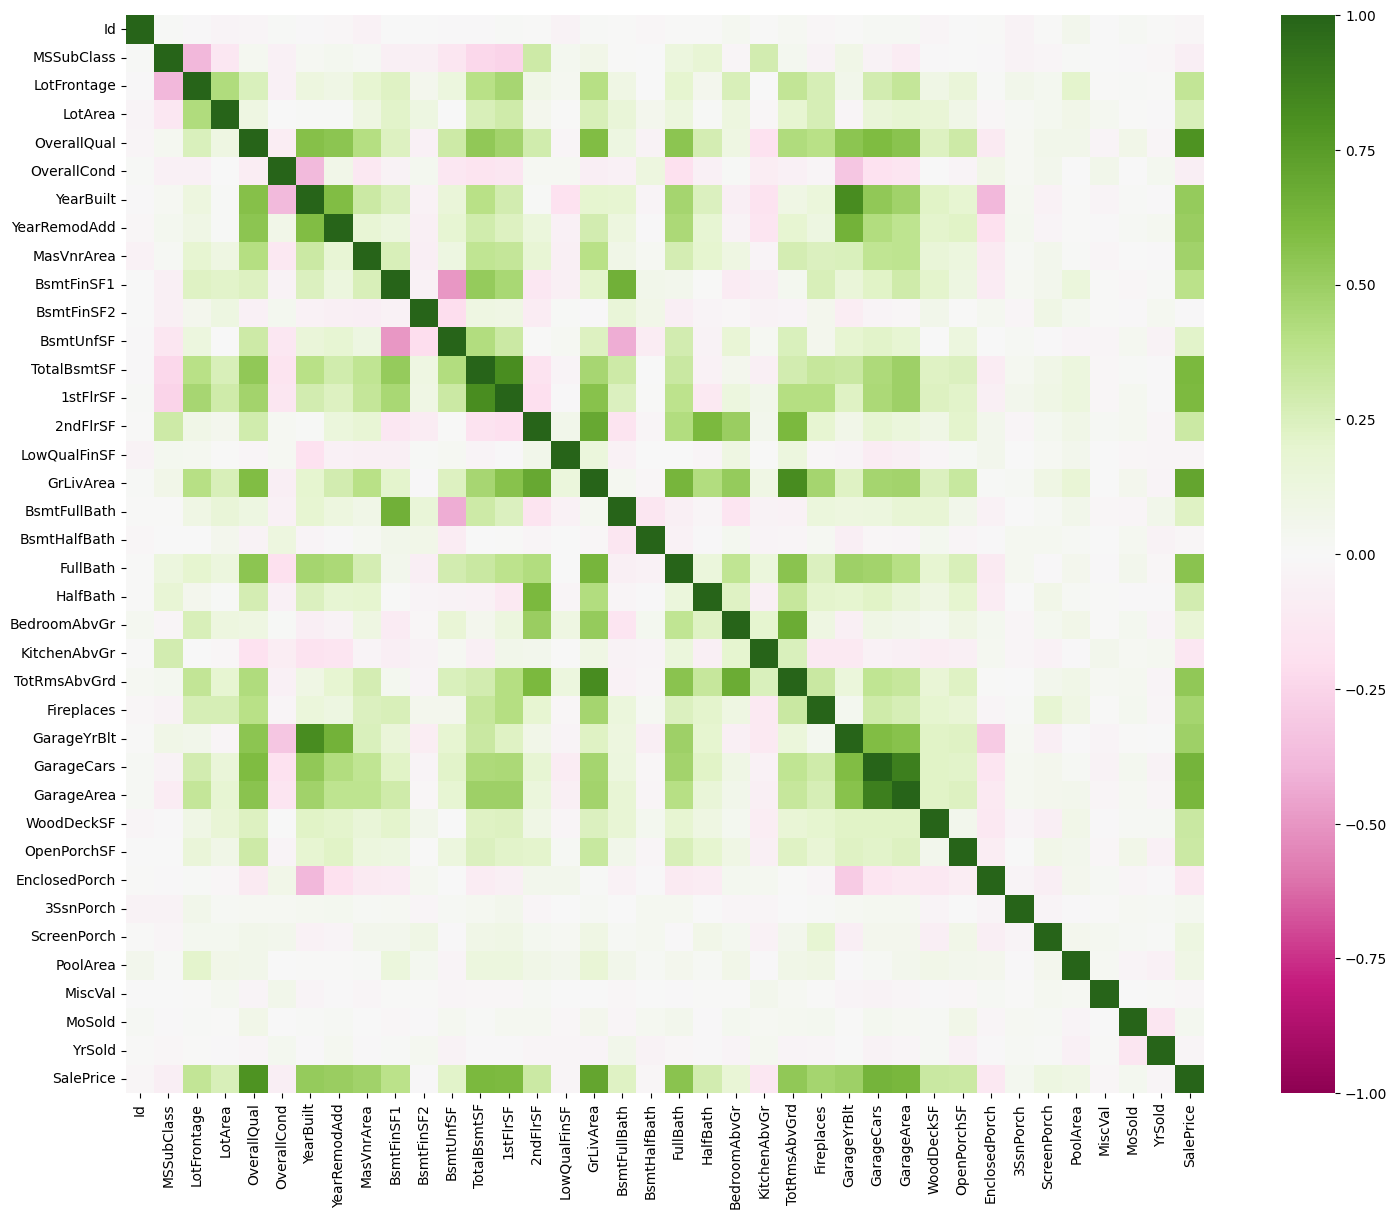

In [40]:
import pandas as pd
import numpy as np

# run correlation matrix and plot
f, ax = plt.subplots(figsize=(20, 14))
corr = real_estate_data.select_dtypes(include='number').corr()
seaborn.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            square=True, ax=ax, center=0, vmin=-1.0, vmax=1.0, cmap="PiYG")
plt.show()

In [69]:
no_op_columns = ["BsmtFinSF2", "LowQualFinSF", "BsmtHalfBath", "3SsnPorch", "MiscVal", "MoSold", "YrSold", "ScreenPorch", "PoolArea", "LotFrontage", "MasVnrArea", "GarageYrBlt"]
real_estate_data2 = real_estate_data.drop(columns=no_op_columns).select_dtypes(include='number')
real_estate_data2.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
0,1,60,8450,7,5,2003,2003,706,150,856,...,3,1,8,0,2,548,0,61,0,208500
1,2,20,9600,6,8,1976,1976,978,284,1262,...,3,1,6,1,2,460,298,0,0,181500
2,3,60,11250,7,5,2001,2002,486,434,920,...,3,1,6,1,2,608,0,42,0,223500
3,4,70,9550,7,5,1915,1970,216,540,756,...,3,1,7,1,3,642,0,35,272,140000
4,5,60,14260,8,5,2000,2000,655,490,1145,...,4,1,9,1,3,836,192,84,0,250000


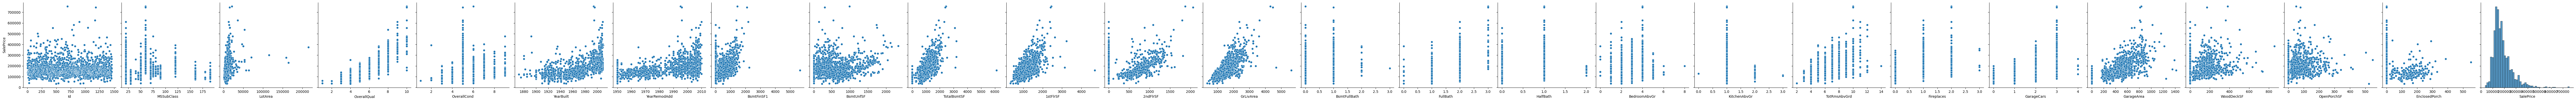

In [70]:
import seaborn
import matplotlib.pyplot as plt

seaborn.pairplot(real_estate_data2, y_vars=['SalePrice'], height=4.0)
plt.show()

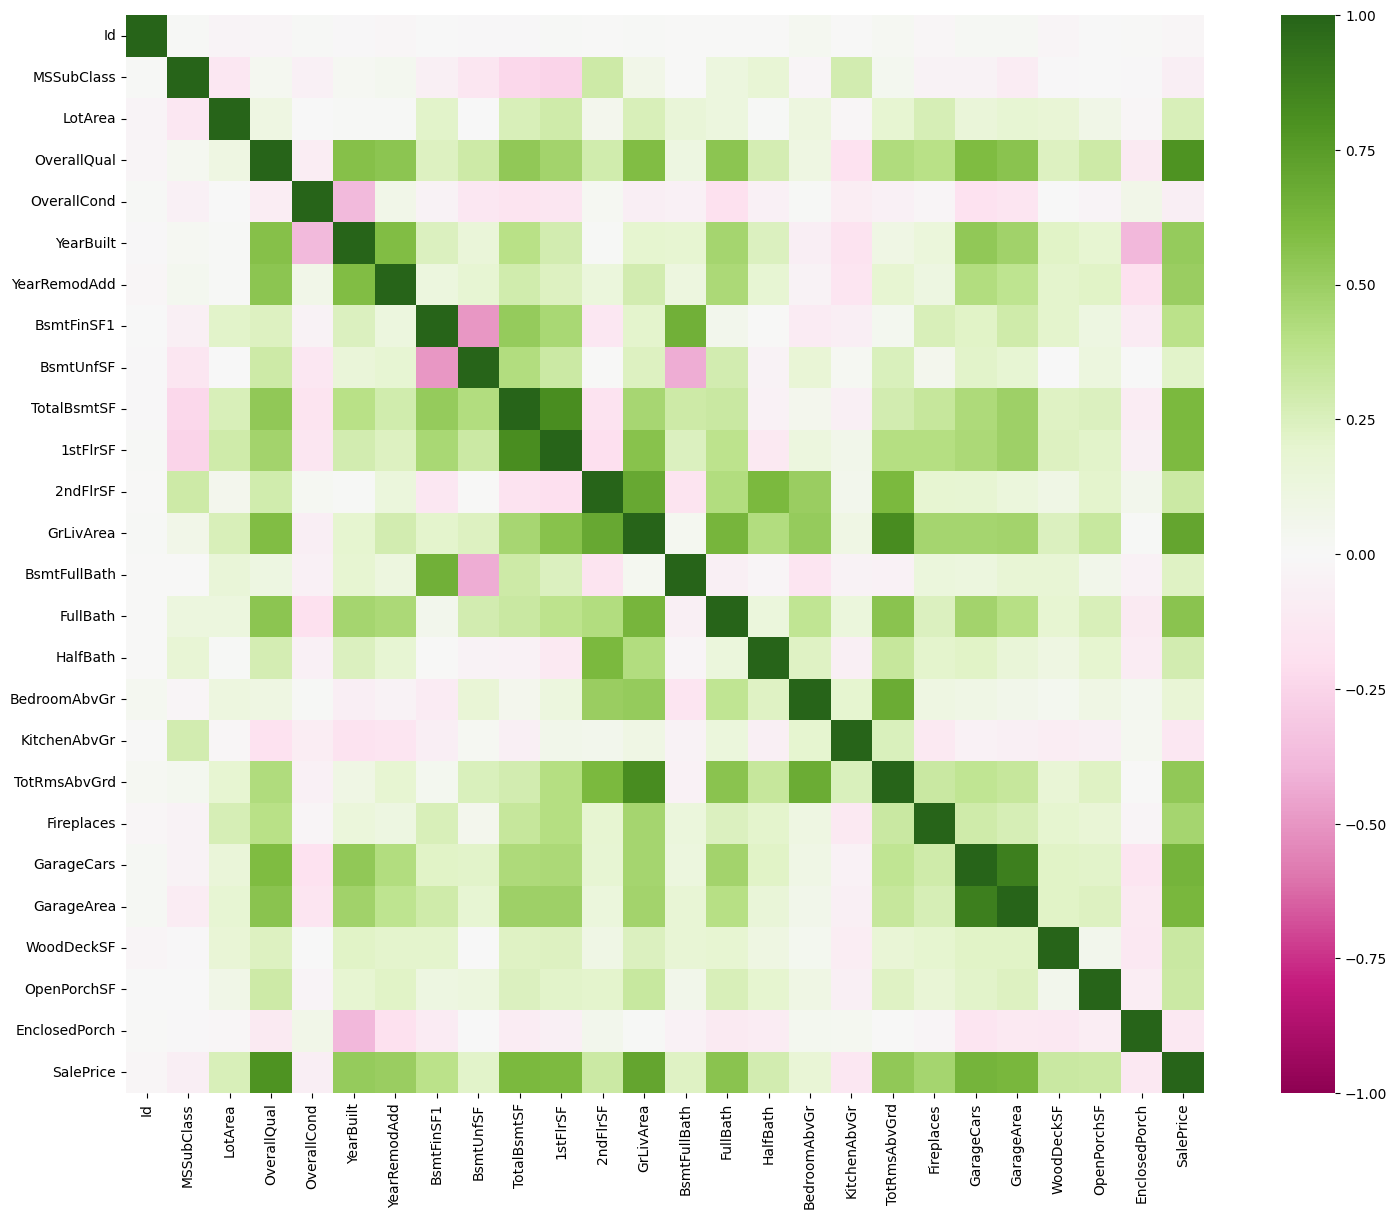

In [71]:
import pandas as pd
import numpy as np

# run correlation matrix and plot
f, ax = plt.subplots(figsize=(20, 14))
corr = real_estate_data2.select_dtypes(include='number').corr()
seaborn.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            square=True, ax=ax, center=0, vmin=-1.0, vmax=1.0, cmap="PiYG")
plt.show()

In [72]:
#real_estate_data2.isnull().values.any()

for column in real_estate_data2.columns:
    has_nulls = real_estate_data2[column].isnull().values.any()
    if has_nulls:
        print(f"Column {column} has nulls")

In [73]:
from sklearn.preprocessing import StandardScaler

real_estate_standard_scaler = StandardScaler()
real_estate_scaled_features = real_estate_standard_scaler.fit_transform(real_estate_data2.values)

real_estate_scaled_features_df = pd.DataFrame(real_estate_scaled_features, index=real_estate_data2.index, columns=real_estate_data2.columns)

real_estate_scaled_features_df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
0,-1.730865,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.944591,-0.459303,...,0.163779,-0.211454,0.912210,-0.951226,0.311725,0.351000,-0.752176,0.216503,-0.359325,0.347273
1,-1.728492,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,-0.641228,0.466465,...,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.060731,1.626195,-0.704483,-0.359325,0.007288
2,-1.726120,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.301643,-0.313369,...,0.163779,-0.211454,-0.318683,0.600495,0.311725,0.631726,-0.752176,-0.070361,-0.359325,0.536154
3,-1.723747,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.061670,-0.687324,...,0.163779,-0.211454,0.296763,0.600495,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.515281
4,-1.721374,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,0.463568,-0.174865,0.199680,...,1.390023,-0.211454,1.527656,0.600495,1.650307,1.698485,0.780197,0.563760,-0.359325,0.869843


In [74]:
real_estate_scaled_features_df.to_csv("standardized-kaggle-train-data.csv")

In [80]:
real_estate_data2.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'SalePrice'],
      dtype='object')

In [75]:
print(real_estate_standard_scaler.scale_)
print(real_estate_standard_scaler.mean_)
print(real_estate_standard_scaler.var_)

[4.21465598e+02 4.22860820e+01 9.97784611e+03 1.38252284e+00
 1.11241818e+00 3.01925588e+01 2.06383353e+01 4.55941866e+02
 4.41715605e+02 4.38555057e+02 3.86455322e+02 4.36378914e+02
 5.25300394e+02 5.18732867e-01 5.50727099e-01 5.02713131e-01
 8.15498620e-01 2.20262727e-01 1.62483655e+00 6.44445572e-01
 7.47059036e-01 2.13731608e+02 1.25295863e+02 6.62333334e+01
 6.10982138e+01 7.94152919e+04]
[7.30500000e+02 5.68972603e+01 1.05168281e+04 6.09931507e+00
 5.57534247e+00 1.97126781e+03 1.98486575e+03 4.43639726e+02
 5.67240411e+02 1.05742945e+03 1.16262671e+03 3.46992466e+02
 1.51546370e+03 4.25342466e-01 1.56506849e+00 3.82876712e-01
 2.86643836e+00 1.04657534e+00 6.51780822e+00 6.13013699e-01
 1.76712329e+00 4.72980137e+02 9.42445205e+01 4.66602740e+01
 2.19541096e+01 1.80921196e+05]
[1.77633250e+05 1.78811273e+03 9.95574129e+07 1.91136939e+00
 1.23747420e+00 9.11590608e+02 4.25940882e+02 2.07882985e+05
 1.95112676e+05 1.92330538e+05 1.49347716e+05 1.90426557e+05
 2.75940503e+05 2.690